In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
import matplotlib.pyplot as plt

(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_train_flatten = x_train_flatten / 255
x_test_flatten = x_test_flatten / 255


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8496 - loss: 0.5377
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9504 - loss: 0.1714
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9643 - loss: 0.1234
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9713 - loss: 0.0977
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9756 - loss: 0.0821
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9805 - loss: 0.0664
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9829 - loss: 0.0583
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9847 - loss: 0.0525
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9866 - loss: 0.0446
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9882 - loss: 0.0409


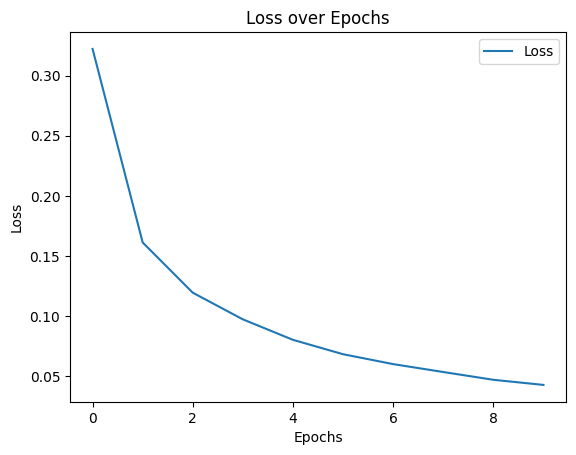

In [48]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train_flatten,y_train,epochs=10)

plt.plot(history.history['loss'], label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


np.int64(7)

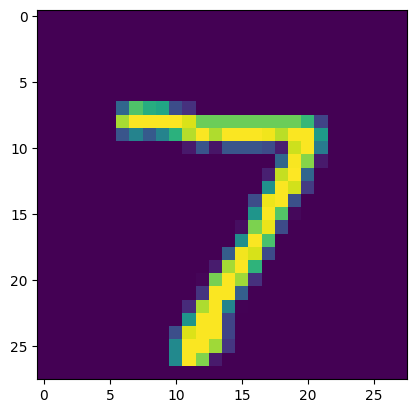

In [49]:
plt.imshow(x_test[0])
y_predict = model.predict(x_test_flatten)
np.argmax(y_predict[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step


<Axes: >

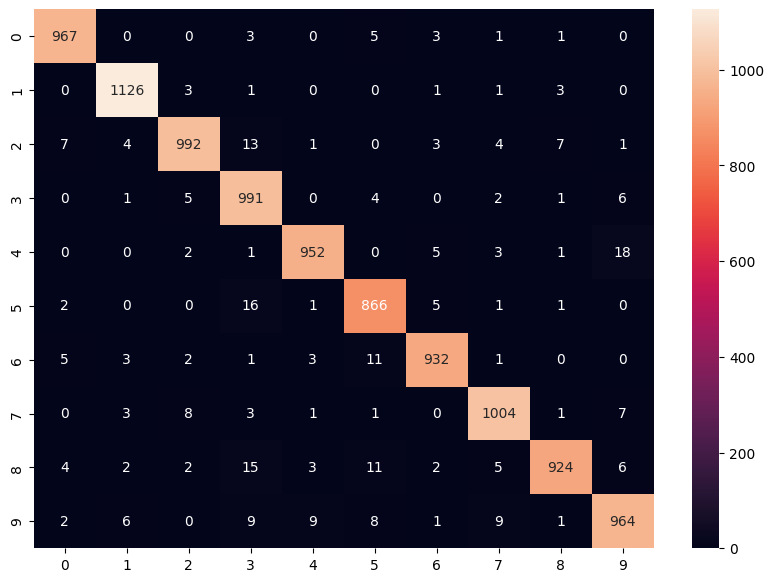

In [50]:
import seaborn as sn

y_predict = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')